In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from hdf5_dataset import HDF5Dataset
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Load the Fashion MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)

In [15]:
# Define Model 1
class Model_1(nn.Module):
    def __init__(self):
        super(Model_1, self).__init__()
        self.hidden = nn.Linear(28 * 28, 128)
        self.output = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.hidden(x))
        x = self.output(x)
        return x

In [16]:
# Define Model 2
class Model_2(nn.Module):
    def __init__(self):
        super(Model_2, self).__init__()
        self.hidden = nn.Linear(28 * 28, 48)
        self.dropout = nn.Dropout(0.2)
        self.output = nn.Linear(48, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.hidden(x))
        x = self.dropout(x)
        x = self.output(x)
        return x

In [17]:
# Train model
def train_model(model, optimizer, criterion):
    epochs = 10
    for epoch in range(epochs):
        for images, labels in train_loader:
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
        
        # Evaluate test set
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                output = model(images)
                _, predicted = torch.max(output.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
        

In [18]:
criterion = nn.CrossEntropyLoss()
device = 'cpu'

model1 = Model_1().to(device)
optimizer1 = optim.SGD(model1.parameters(), lr=0.1)

model2 = Model_2().to(device)
optimizer2 = optim.SGD(model2.parameters(), lr=0.1, weight_decay=1e-4)

print("For Model 1")
train_model(model1, optimizer1, criterion)

print()
print("For Model 2")
train_model(model2, optimizer2, criterion)

For Model 1
Test Accuracy: 87.79%

For Model 2
Test Accuracy: 86.02%


In [19]:
# Plot histograms for the weights
def histogram(model, title):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    axs[0].hist(model.hidden.weight.data.cpu().numpy().flatten(), bins=50)
    axs[0].set_title("Input Layer Weights")
    axs[0].set_xlabel("Weight Values")
    axs[0].set_ylabel("Frequency")
    
    axs[1].hist(model.output.weight.data.cpu().numpy().flatten(), bins=50)
    axs[1].set_title("Hidden Layer Weights")
    axs[1].set_xlabel("Weight Values")
    axs[1].set_ylabel("Frequency")
    fig.suptitle(title)
    plt.show()

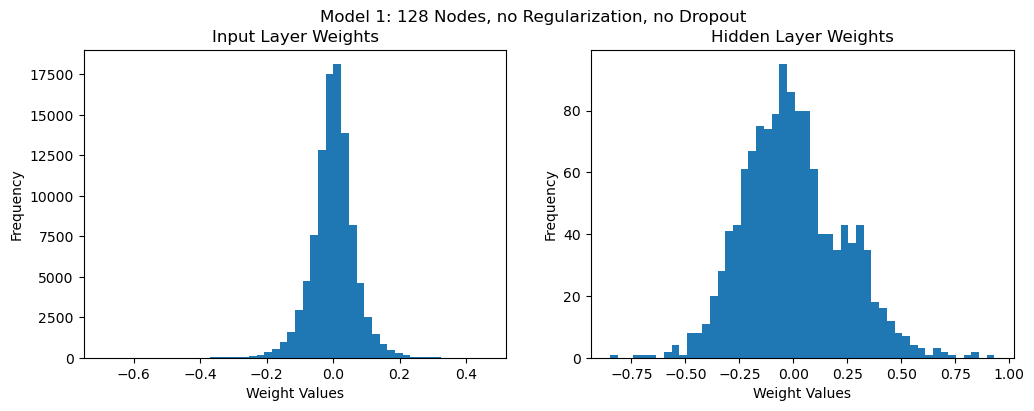

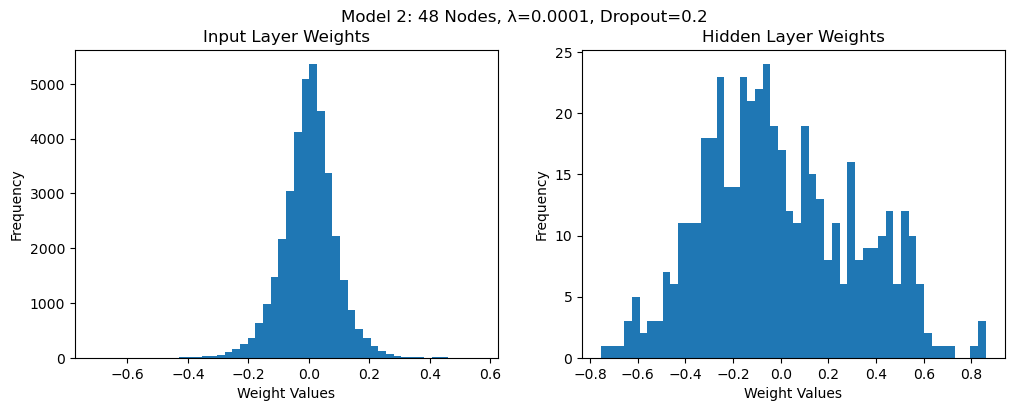

In [20]:
histogram(model1, "Model 1: 128 Nodes, no Regularization, no Dropout")
histogram(model2, "Model 2: 48 Nodes, λ=0.0001, Dropout=0.2")